## Time series prediction

For my second capstone, I chose to work on the [Kaggle web traffic time series forcasting competition](https://www.kaggle.com/c/web-traffic-time-series-forecasting). The competition goal is to use data on the number of visits to approximately 145,000 Wikipedia articles to predict the number of visits those same articles will recieve over the next two months. Clients potentially interested in prediction methods for this problem include web-based companies or advertisers that want to predict future visits for planning purposes. Time series prediction could also have important applications in many other domains, so methods that perform well in this problem may be interesting to a broad client base.

The predict future wikipedia visits, I use time series of visits for previous days for each series that I wish to predict on:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

time_train_full = pd.read_csv("train_2_final.csv")
time_test = time_train_full.iloc[:, -62:].assign(Page = time_train_full.loc[:, "Page"])
time_train = time_train_full.iloc[:, -72:-62].assign(Page = time_train_full.loc[:, "Page"])
time_train.head()

,2017-07-01,2017-07-02,2017-07-03,2017-07-04,2017-07-05,2017-07-06,2017-07-07,2017-07-08,2017-07-09,2017-07-10,Page
0,23.0,24.0,26.0,15.0,14.0,15.0,19.0,29.0,22.0,25.0,2NE1_zh.wikipedia.org_all-access_spider
1,15.0,26.0,16.0,23.0,19.0,16.0,816.0,20.0,76.0,24.0,2PM_zh.wikipedia.org_all-access_spider
2,1.0,1.0,7.0,1.0,1.0,1.0,10.0,1.0,2.0,6.0,3C_zh.wikipedia.org_all-access_spider
3,7.0,19.0,16.0,10.0,17.0,15.0,22.0,6.0,6.0,18.0,4minute_zh.wikipedia.org_all-access_spider
4,12.0,16.0,6.0,16.0,18.0,12.0,14.0,11.0,16.0,15.0,52_Hz_I_Love_You_zh.wikipedia.org_all-access_s...


While exploring methods the predict future values of each time series, I came to realize that a very simple method, taking the median of each time series over a window of recent values, can acutally perform quite well, and possible could be a useful feature for prediction. Here I plot the log median values in a ten day window against the observed log visits for the next 60 days:

/Users/scottpiraino/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
/Users/scottpiraino/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


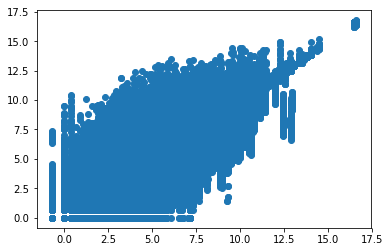

In [2]:
time_train_median = time_train.median(axis = 1, skipna = True).fillna(0)
time_test_melt = pd.melt(time_test, id_vars = ["Page"])
time_train_median_frame = time_train.loc[:, "Page"].to_frame(name = "Page").assign(page_median = time_train_median)
time_test_melt_join = time_test_melt.merge(time_train_median_frame, on = "Page", how = "left")
page_median_log = time_test_melt_join.loc[:, "page_median"]
page_median_log[page_median_log == 0] = 1
page_median_log = np.log(page_median_log.values)
page_observed_log = time_test_melt_join.loc[:, "value"]
page_observed_log[page_observed_log == 0] = 1
page_observed_log = np.log(page_observed_log.values)
plt.scatter(page_median_log, page_observed_log)

The median is highly correlated with the future values its associated time series, suggesting that it may be a useful feature for prediction.